# Explore here

In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [2]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
tracks = sp.artist_top_tracks(artist_id='51Blml2LZPmy7TTiAg47vQ')

In [17]:
df = pd.DataFrame(columns=['Songs', 'Duration', 'Popularity'])
for i in range(len(tracks['tracks'])):
    df = df.append({'Songs':tracks['tracks'][i]['name'], 'Duration':tracks['tracks'][i]['duration_ms'], 'Popularity':tracks['tracks'][i]['popularity']}, ignore_index=True)

/tmp/ipykernel_544/2768786336.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Songs':tracks['tracks'][i]['name'], 'Duration':tracks['tracks'][i]['duration_ms'], 'Popularity':tracks['tracks'][i]['popularity']}, ignore_index=True)
/tmp/ipykernel_544/2768786336.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Songs':tracks['tracks'][i]['name'], 'Duration':tracks['tracks'][i]['duration_ms'], 'Popularity':tracks['tracks'][i]['popularity']}, ignore_index=True)
/tmp/ipykernel_544/2768786336.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Songs':tracks['tracks'][i]['name'], 'Duration':tracks['tracks'][i]['duration_ms'], 'Popularity':tracks['tracks'][i]['popularity']}, ig

In [8]:
df

,Songs,Duration,Popularity
0,With Or Without You,295515,83
1,I Still Haven't Found What I'm Looking For,277476,81
2,Beautiful Day,246400,68
3,One,276186,79
4,Sunday Bloody Sunday - Remastered 2008,279440,75
5,Pride (In The Name Of Love) - Remastered 2009,228426,65
6,Where The Streets Have No Name - Remastered,337505,73
7,Atomic City,210842,71
8,Sweetest Thing,184543,70
9,Vertigo,193520,70


In [18]:
for item in df['Duration']:
  df['Duration'].replace(item, ((item/(1000*60))%60), inplace=True)

In [19]:
df

,Songs,Duration,Popularity
0,With Or Without You,4.925250,83
1,I Still Haven't Found What I'm Looking For,4.624600,81
2,Beautiful Day,4.106667,68
3,One,4.603100,79
4,Sunday Bloody Sunday - Remastered 2008,4.657333,75
5,Pride (In The Name Of Love) - Remastered 2009,3.807100,65
6,Where The Streets Have No Name - Remastered,5.625083,73
7,Atomic City,3.514033,71
8,Sweetest Thing,3.075717,70
9,Vertigo,3.225333,70


In [64]:
df = df.sort_values(by='Popularity')
df.head(3)

,Songs,Duration,Popularity
5,Pride (In The Name Of Love) - Remastered 2009,3.807100,65
2,Beautiful Day,4.106667,68
8,Sweetest Thing,3.075717,70


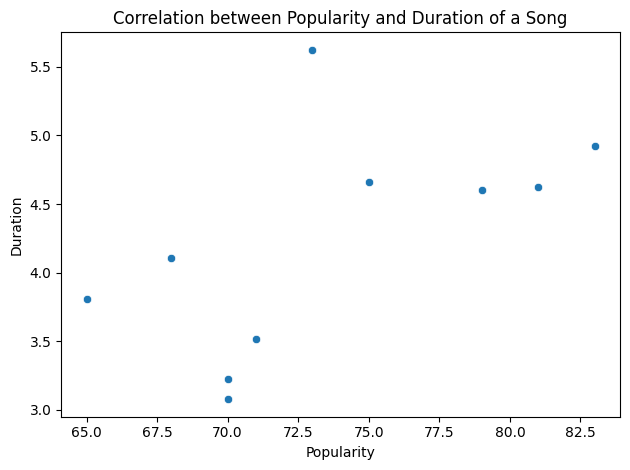

In [26]:
sns.scatterplot(df, x='Popularity', y='Duration')
plt.title('Correlation between Popularity and Duration of a Song')
plt.xlabel('Popularity')
plt.ylabel('Duration')
plt.tight_layout()
plt.show()

In [25]:
corr_matrix = df[['Duration', 'Popularity']].corr()
corr_matrix

,Duration,Popularity
Duration,1.000000,0.583743
Popularity,0.583743,1.000000


In [24]:
df.dtypes

Songs          object
Duration      float64
Popularity      int64
dtype: object

In [23]:
df['Popularity'] = df['Popularity'].astype(int)

<Axes: >

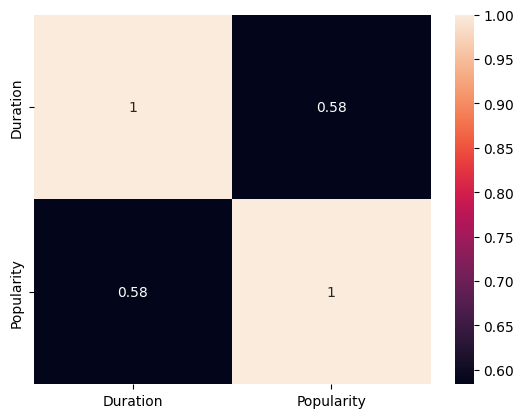

In [27]:
sns.heatmap(corr_matrix, annot=True)